# Pruébate 2 
1. Lee en dos dataframes: **birth y death**, estos almacenan, por país, las tasas brutas de natalidad y mortalidad desde 1960. La tasa bruta de natalidad indica el número de nacidos vivos que se producen al año, por cada 1000 habitantes. Análogamente se define la mortalidad.


In [113]:
# Librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# DataFrames
birth = pd.read_csv('Birth.csv')
death = pd.read_csv('Death.csv')

In [114]:
# Columnas
print(birth.columns)
print(death.columns)

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')
Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003'

In [115]:
birth.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,35.679,34.529,33.320,32.050,30.737,29.413,28.121,26.908,...,11.361,11.214,11.123,11.090,11.111,11.179,11.281,11.404,11.532,11.652
1,Afghanistan,AFG,51.279,51.373,51.457,51.530,51.589,51.631,51.652,51.650,...,40.903,39.829,38.750,37.690,36.670,35.706,34.809,33.981,33.211,32.487
2,Angola,AGO,49.080,48.779,48.547,48.430,48.450,48.622,48.936,49.343,...,46.143,45.656,45.102,44.493,43.847,43.182,42.520,41.882,41.281,40.729
3,Albania,ALB,40.924,40.368,39.627,38.723,37.695,36.599,35.496,34.435,...,11.945,12.001,12.100,12.197,12.257,12.259,12.197,12.080,11.934,11.780
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.900,9.800,NaN,9.500,NaN,NaN,NaN,8.800,NaN,7.200


2. A partir de los dataframes anteriores, obtén otros dos, mexico_birhts, mexico_deaths, donde únicamente almacenes la información de México.

In [116]:
# Births
mexico_births = birth[birth['Country Name'] == 'Mexico']
mexico_births.set_index('Country Name',inplace=True)
mexico_births = mexico_births.drop(['Country Code'], axis = 1)
mexico_births = mexico_births.T
mexico_births.index.name = 'Years'
mexico_births.columns.name = ''
mexico_births.columns=['Births']
mexico_births.head()

,Births
Years,
1960,45.179
1961,44.919
1962,44.698
1963,44.517
1964,44.366


In [117]:
# Deaths 
mexico_deaths = death[death['Country Name'] == 'Mexico']
mexico_deaths.set_index('Country Name',inplace=True)
mexico_deaths = mexico_deaths.drop(['Country Code'],axis=1)
mexico_deaths = mexico_deaths.T
mexico_deaths.index.name = 'Year'
mexico_deaths.columns.name = ''
mexico_deaths.columns = ['Deaths']
mexico_deaths.head(5)

,Deaths
Year,
1960,12.270
1961,11.915
1962,11.610
1963,11.346
1964,11.114


3. Junta los dataframes para mantener toda la información únicamente en uno.

In [118]:
mexico = mexico_births.join(mexico_deaths)
mexico.head(5)

,Births,Deaths
Years,,
1960,45.179,12.270
1961,44.919,11.915
1962,44.698,11.610
1963,44.517,11.346
1964,44.366,11.114


4. Grafica el dataframe anterior utilizando Seaborn. Ajusta las marcas de los ejes para que se muestren en períodos de 5.

Text(0.5, 0, 'Year')

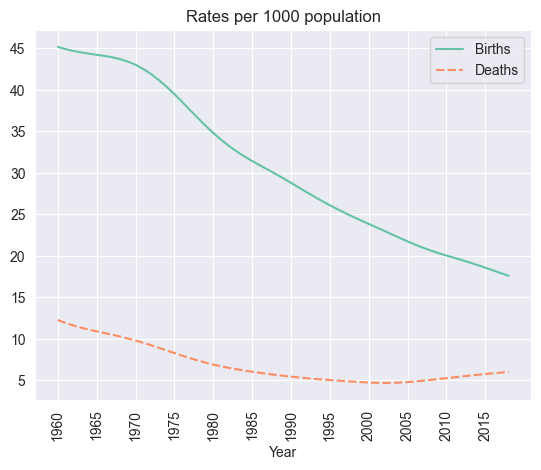

In [119]:
sns.lineplot(data=mexico)
sns.set_style('whitegrid')
sns.set_palette('dark')
plt.title('Rates per 1000 population')
plt.xticks(np.arange(0,len(mexico)+1,5))
plt.xticks(rotation=90)
plt.xlabel('Year')

5. Ordena el dataframe inicial death para determinar los tres países con la tasa de mortalidad más alta en el 2018. Obtén una muestra, **sample**, donde incluyas dichos países, México y otro país de tu selección. Visauliza las tasas de un gráfica de barras horizontales usando Pandas.

In [120]:
# Ordenando los valores de menor a mayor
death.sort_values('2018',inplace=True)
death.dropna(axis=0,subset=['2018'],inplace=True)
sample = pd.concat(
    [death[death['Country Name']=='Mexico'],
     death[death['Country Name'] == 'Spain'],
     death[-3:]])
sample

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
152,Mexico,MEX,12.270,11.915,11.610,11.346,11.114,10.903,10.701,10.498,...,5.163,5.266,5.369,5.471,5.572,5.67,5.763,5.851,5.933,6.01
68,Spain,ESP,8.600,8.300,8.700,8.800,8.400,8.400,8.400,8.400,...,8.300,8.200,8.300,8.600,8.300,8.50,9.100,8.800,9.100,9.10
246,Ukraine,UKR,8.675,8.420,8.231,8.115,8.072,8.097,8.182,8.310,...,15.300,15.200,14.500,14.500,14.600,14.70,14.900,14.700,14.500,14.80
143,Latvia,LVA,10.000,10.100,10.800,10.300,9.400,10.100,10.200,10.600,...,14.000,14.300,13.900,14.300,14.300,14.30,14.400,14.600,14.800,15.00
19,Bulgaria,BGR,8.100,7.900,8.700,8.200,7.900,8.200,8.300,9.000,...,14.500,14.900,14.700,15.000,14.400,15.10,15.300,15.100,15.500,15.40


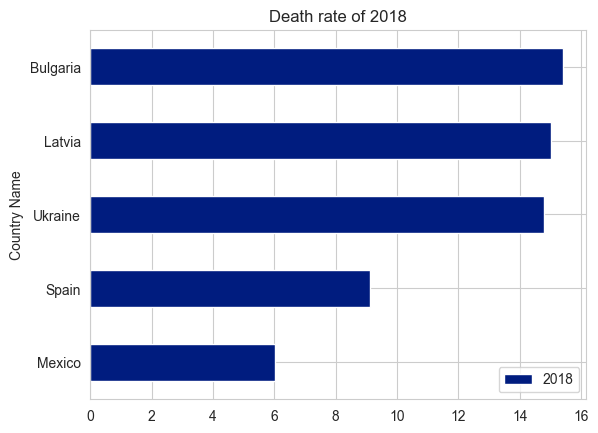

In [121]:
sample.plot(kind='barh',x='Country Name',y='2018',
            title='Death rate of 2018')
sns.set_palette('Set2')
sns.set_style('darkgrid')

6. Utiliza el dataframe **birth** para realizar un análisis de la tasa de natalidad en el 2018. Se busca determinar cuantos países están por debaje del promedio de nacimiento y cuántos por encima. No olivdes borras los registros que no tienen información registrada antes de hacer los conteos. Visualiza los resultados en un gráfico circular usando Matplotlib.

In [122]:
birth.sort_values('2018',inplace=True)
birth.dropna(axis=0,subset = ['2018'],inplace=True)
birth

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
147,Monaco,MCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.100,7.800,NaN,5.900
124,"Korea, Rep.",KOR,42.277,41.013,39.579,38.065,36.552,35.119,33.820,32.650,...,9.000000,9.400000,9.400,9.600,8.600,8.600,8.600,7.900,7.000,6.400
190,Puerto Rico,PRI,32.400,31.400,31.300,31.000,31.000,30.700,28.900,26.700,...,11.720000,11.300000,11.100,10.600,10.100,9.700,9.000,8.300,7.300,6.700
210,San Marino,SMR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.666667,10.333333,10.000,8.700,9.700,9.100,8.200,7.900,6.700,6.800
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.900000,9.800000,NaN,9.500,NaN,NaN,NaN,8.800,NaN,7.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,"Congo, Dem. Rep.",COD,46.651,46.732,46.802,46.856,46.891,46.903,46.888,46.851,...,45.105000,44.855000,44.549,44.186,43.771,43.309,42.808,42.278,41.732,41.183
156,Mali,MLI,50.189,50.132,50.103,50.099,50.113,50.143,50.184,50.233,...,46.939000,46.379000,45.769,45.129,44.482,43.843,43.226,42.638,42.078,41.543
211,Somalia,SOM,47.630,47.520,47.424,47.339,47.261,47.185,47.105,47.014,...,44.656000,44.162000,43.688,43.254,42.877,42.561,42.303,42.096,41.919,41.753
227,Chad,TCD,45.764,45.669,45.588,45.532,45.512,45.550,45.667,45.870,...,47.194000,46.603000,46.010,45.420,44.841,44.276,43.730,43.201,42.683,42.172


Text(0.5, 1.0, 'Number of countries')

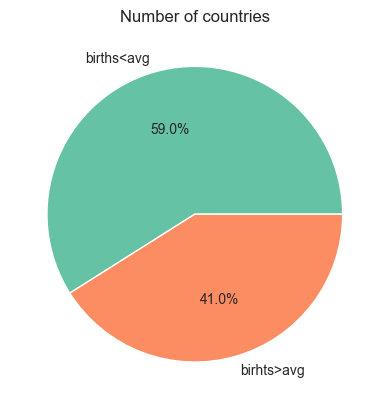

In [129]:
below_avg = len(birth[birth['2018']< birth['2018'].mean()])
count = [below_avg,len(birth['2018']) -below_avg]
plt.pie(count,labels=['births<avg','birhts>avg'],autopct='%1.1f%%')
plt.title('Number of countries')